All libraries imported successfully
Data Loaded:
   Training samples: 888
   Test samples: 222
   Features: 16
   Target range: [63.80, 81.80]
Model Configurations:
   KNN
   DECISION_TREE
   RANDOM_FOREST
   SVR
   RIDGE
   NEURAL_NETWORK
TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION

Training KNN...

   [DURING TRAINING] Per-Fold Performance (Best Hyperparams):
   Fold   Train RMSE     Val RMSE       Gap       
   --------------------------------------------
   1      0.0000         2.4923         2.4923    
   2      0.0000         2.0521         2.0521    
   3      0.0000         2.3662         2.3662    
   4      0.0000         2.2206         2.2206    
   5      0.0000         2.3666         2.3666    
   6      0.0000         2.3950         2.3950    
   7      0.0000         2.5559         2.5559    
   8      0.0000         2.2822         2.2822    
   9      0.0000         2.1788         2.1788    
   10     0.0000         2.1385         2.1385    

   During Training 

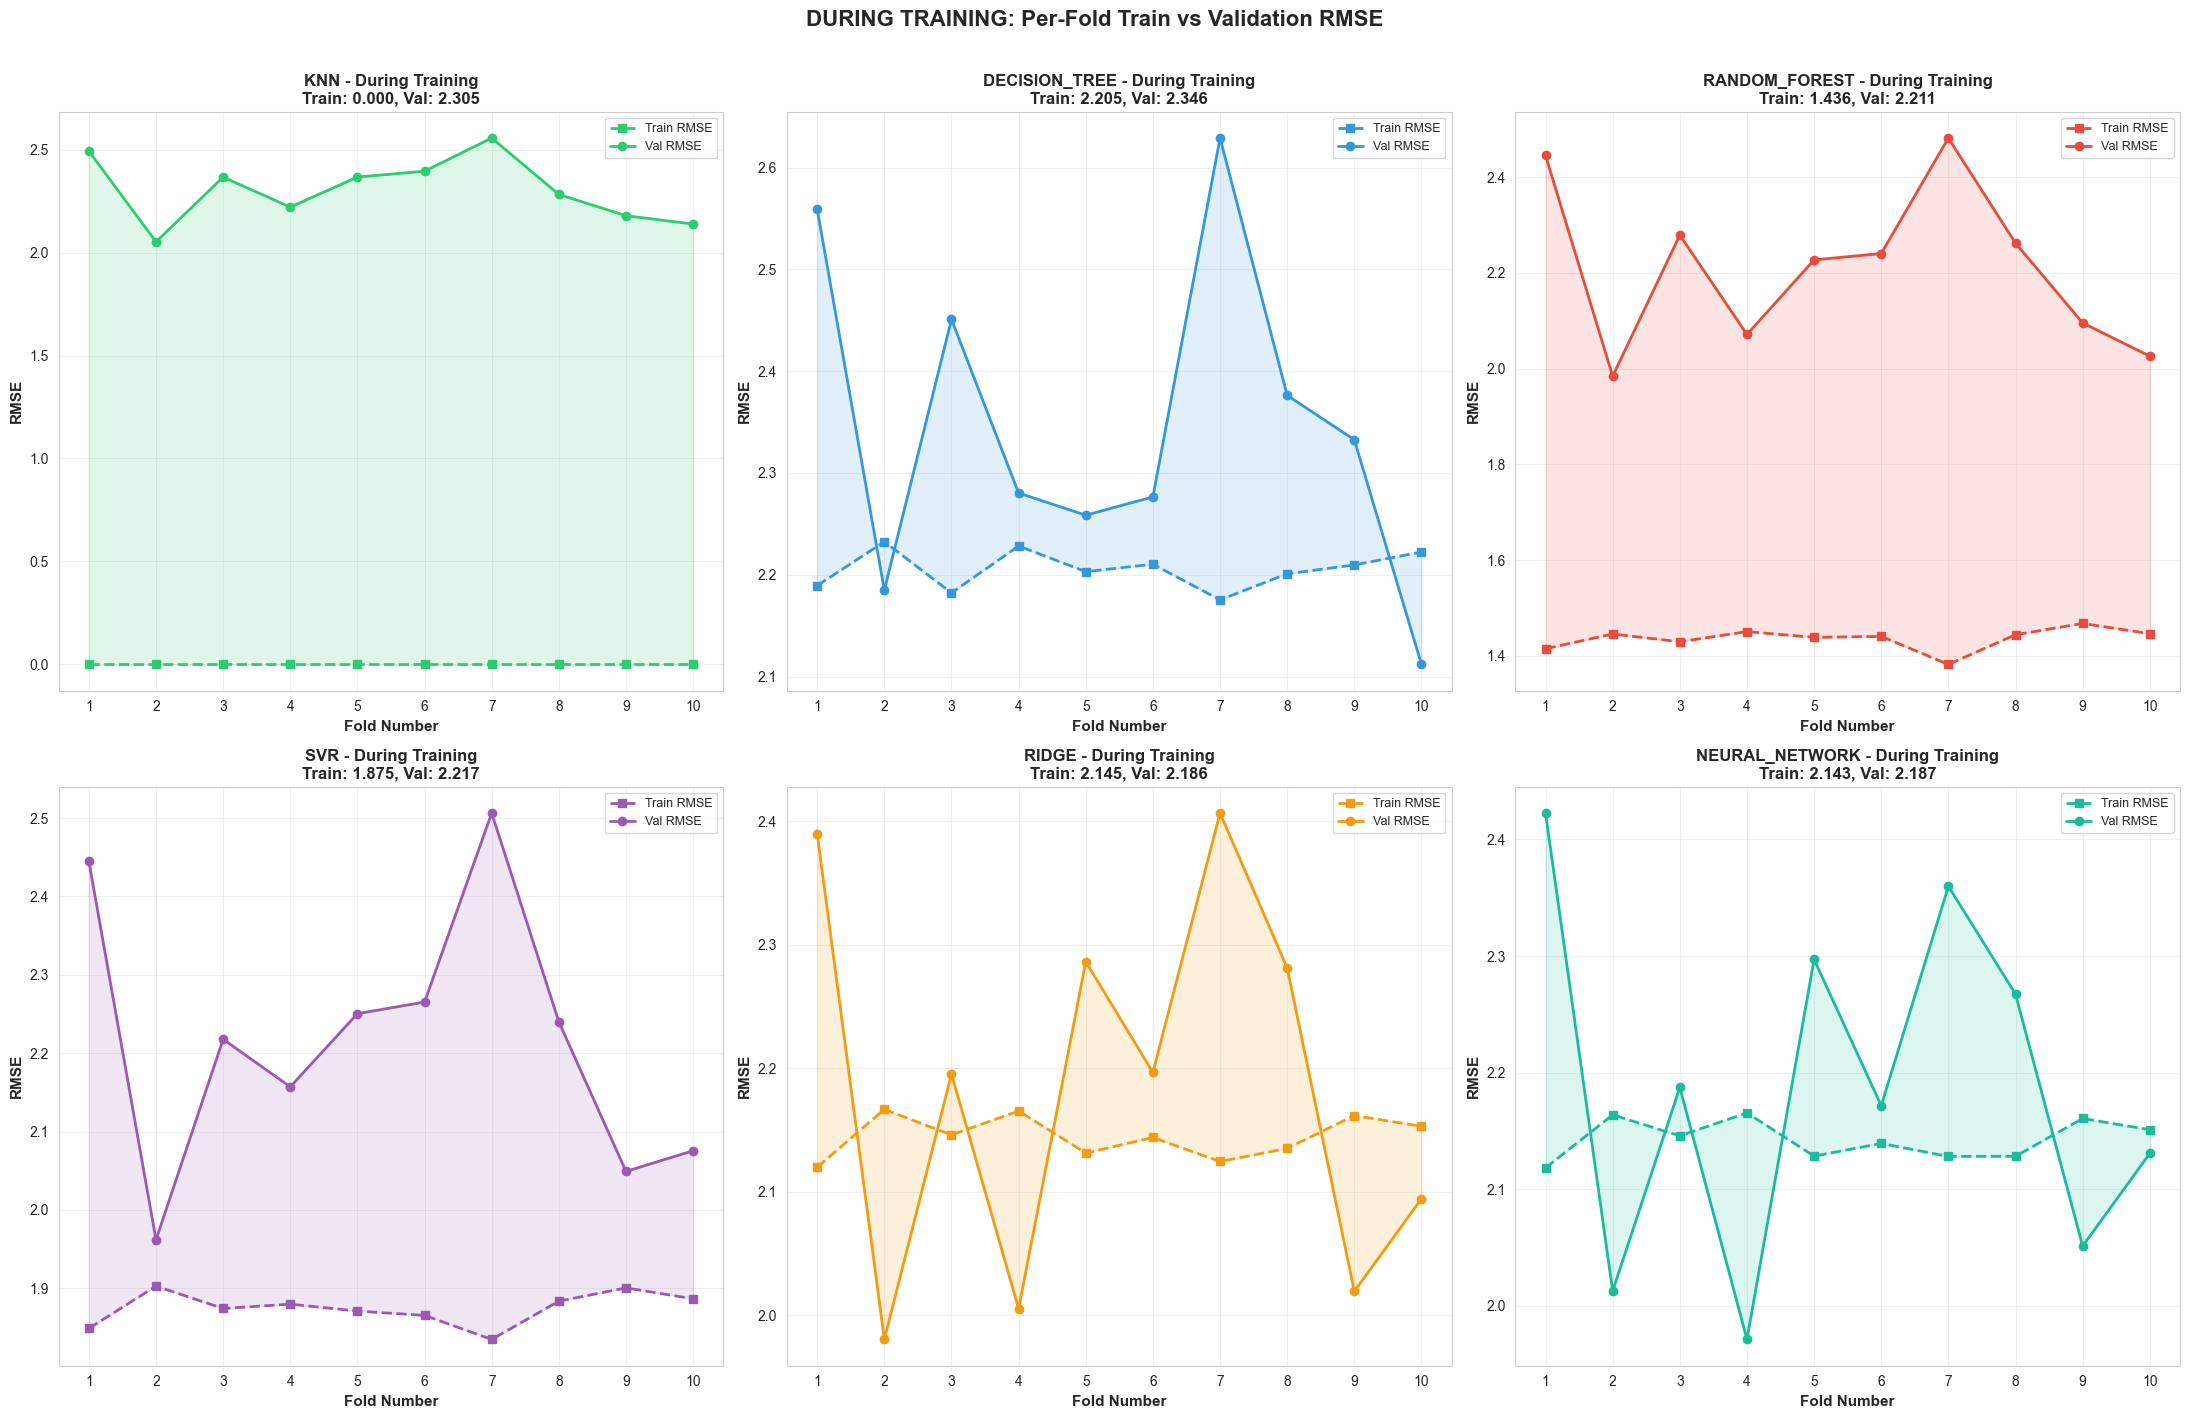

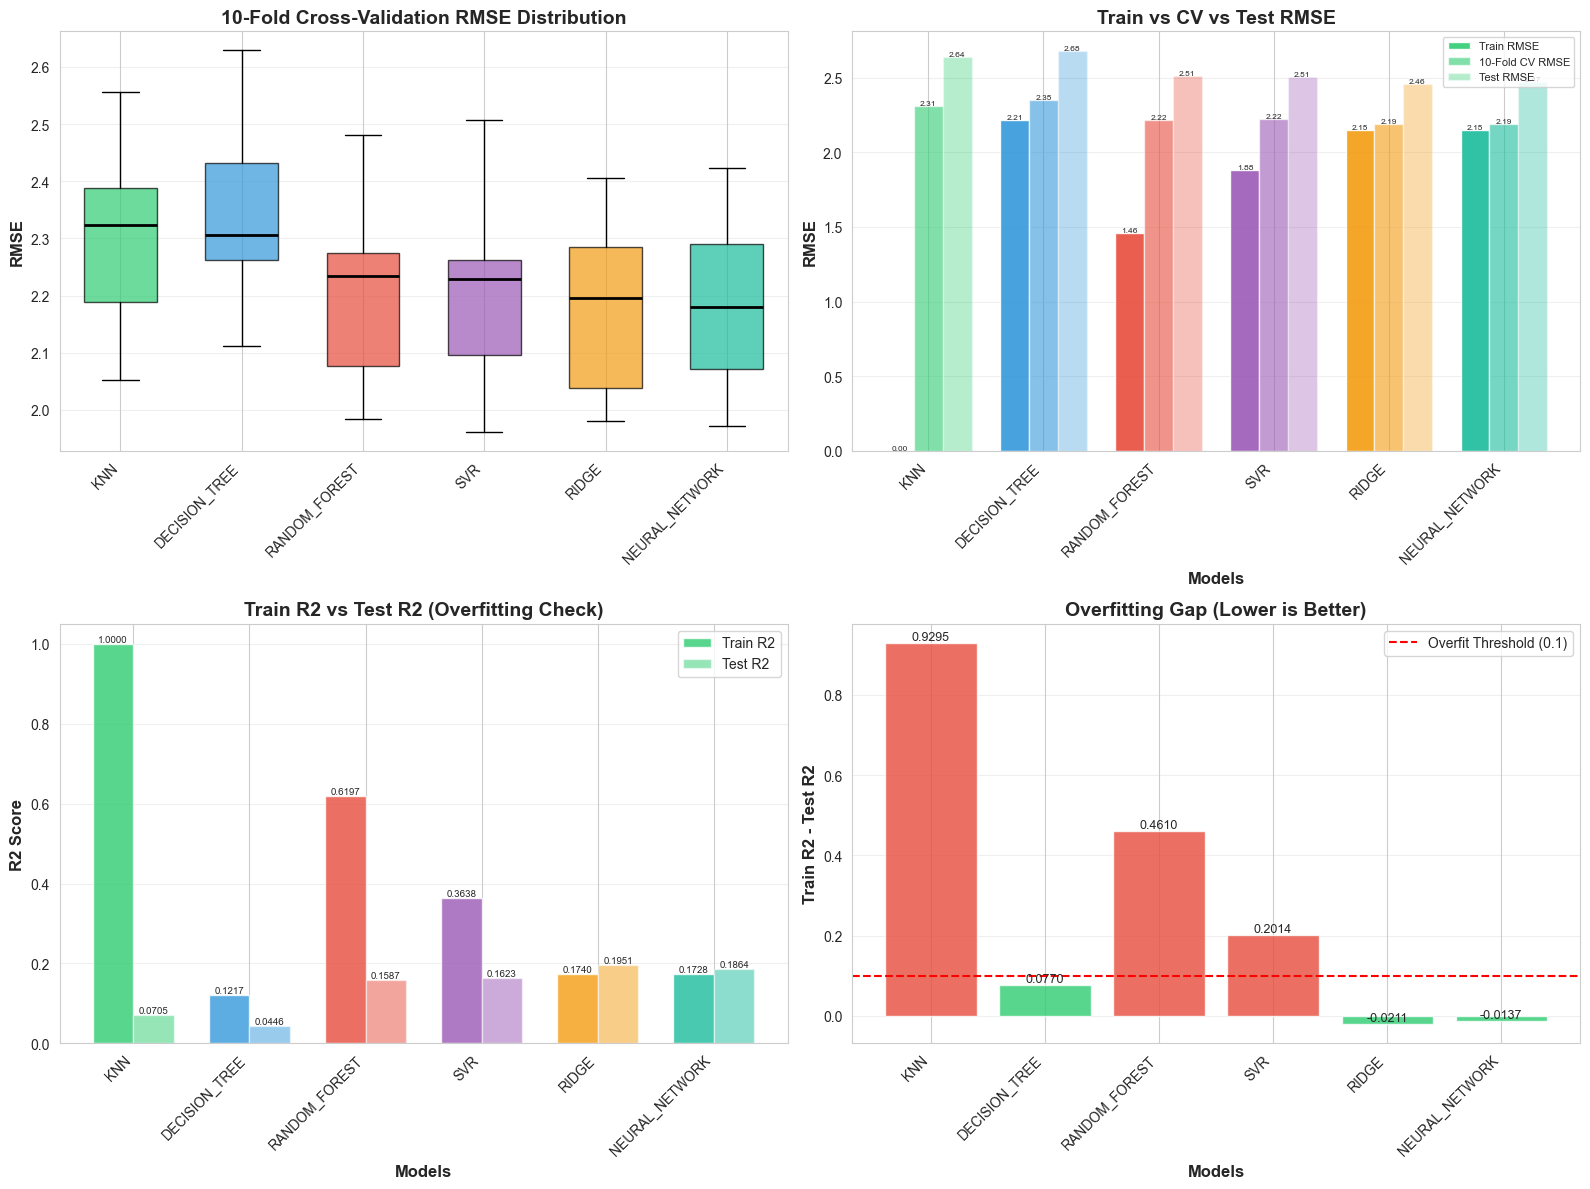


MODEL PERFORMANCE SUMMARY - DURING AND AFTER TRAINING


,Model,Train RMSE,CV RMSE,Test RMSE,Train R2,Test R2,Test MAE,Overfit Gap,Time (s)
0,KNN,0.0000,2.3098,2.6395,1.0000,0.0705,2.1319,0.9295,16.77
1,DECISION_TREE,2.2139,2.3510,2.6760,0.1217,0.0446,2.1251,0.0770,1.62
2,RANDOM_FOREST,1.4567,2.2170,2.5112,0.6197,0.1587,2.0023,0.4610,99.51
3,SVR,1.8843,2.2226,2.5058,0.3638,0.1623,2.0196,0.2014,5.56
4,RIDGE,2.1470,2.1906,2.4564,0.1740,0.1951,1.9876,-0.0211,0.22
5,NEURAL_NETWORK,2.1486,2.1919,2.4695,0.1728,0.1864,2.0038,-0.0137,359.90



Best Model: RIDGE
   Train RMSE: 2.1470
   Test RMSE:  2.4564
   Test R2:    0.1951
   Overfit Gap: -0.0211

DETAILED DURING-TRAINING AND AFTER-TRAINING RESULTS

KNN
   [DURING TRAINING]
      Avg Train RMSE: 0.0000 +/- 0.0000
      Avg Val RMSE:   2.3048 +/- 0.1513
      Avg Fold Gap:   2.3048
   [AFTER TRAINING]
      Train RMSE: 0.0000
      Train MAE:  0.0000
      Train R2:   1.0000
      Test RMSE:  2.6395
      Test MAE:   2.1319
      Test R2:    0.0705
      Mean Residual: -0.0796
      Std Residual:  2.6383

DECISION_TREE
   [DURING TRAINING]
      Avg Train RMSE: 2.2054 +/- 0.0182
      Avg Val RMSE:   2.3460 +/- 0.1533
      Avg Fold Gap:   0.1406
   [AFTER TRAINING]
      Train RMSE: 2.2139
      Train MAE:  1.7619
      Train R2:   0.1217
      Test RMSE:  2.6760
      Test MAE:   2.1251
      Test R2:    0.0446
      Mean Residual: -0.0018
      Std Residual:  2.6760

RANDOM_FOREST
   [DURING TRAINING]
      Avg Train RMSE: 1.4361 +/- 0.0221
      Avg Val RMSE:   2.2112

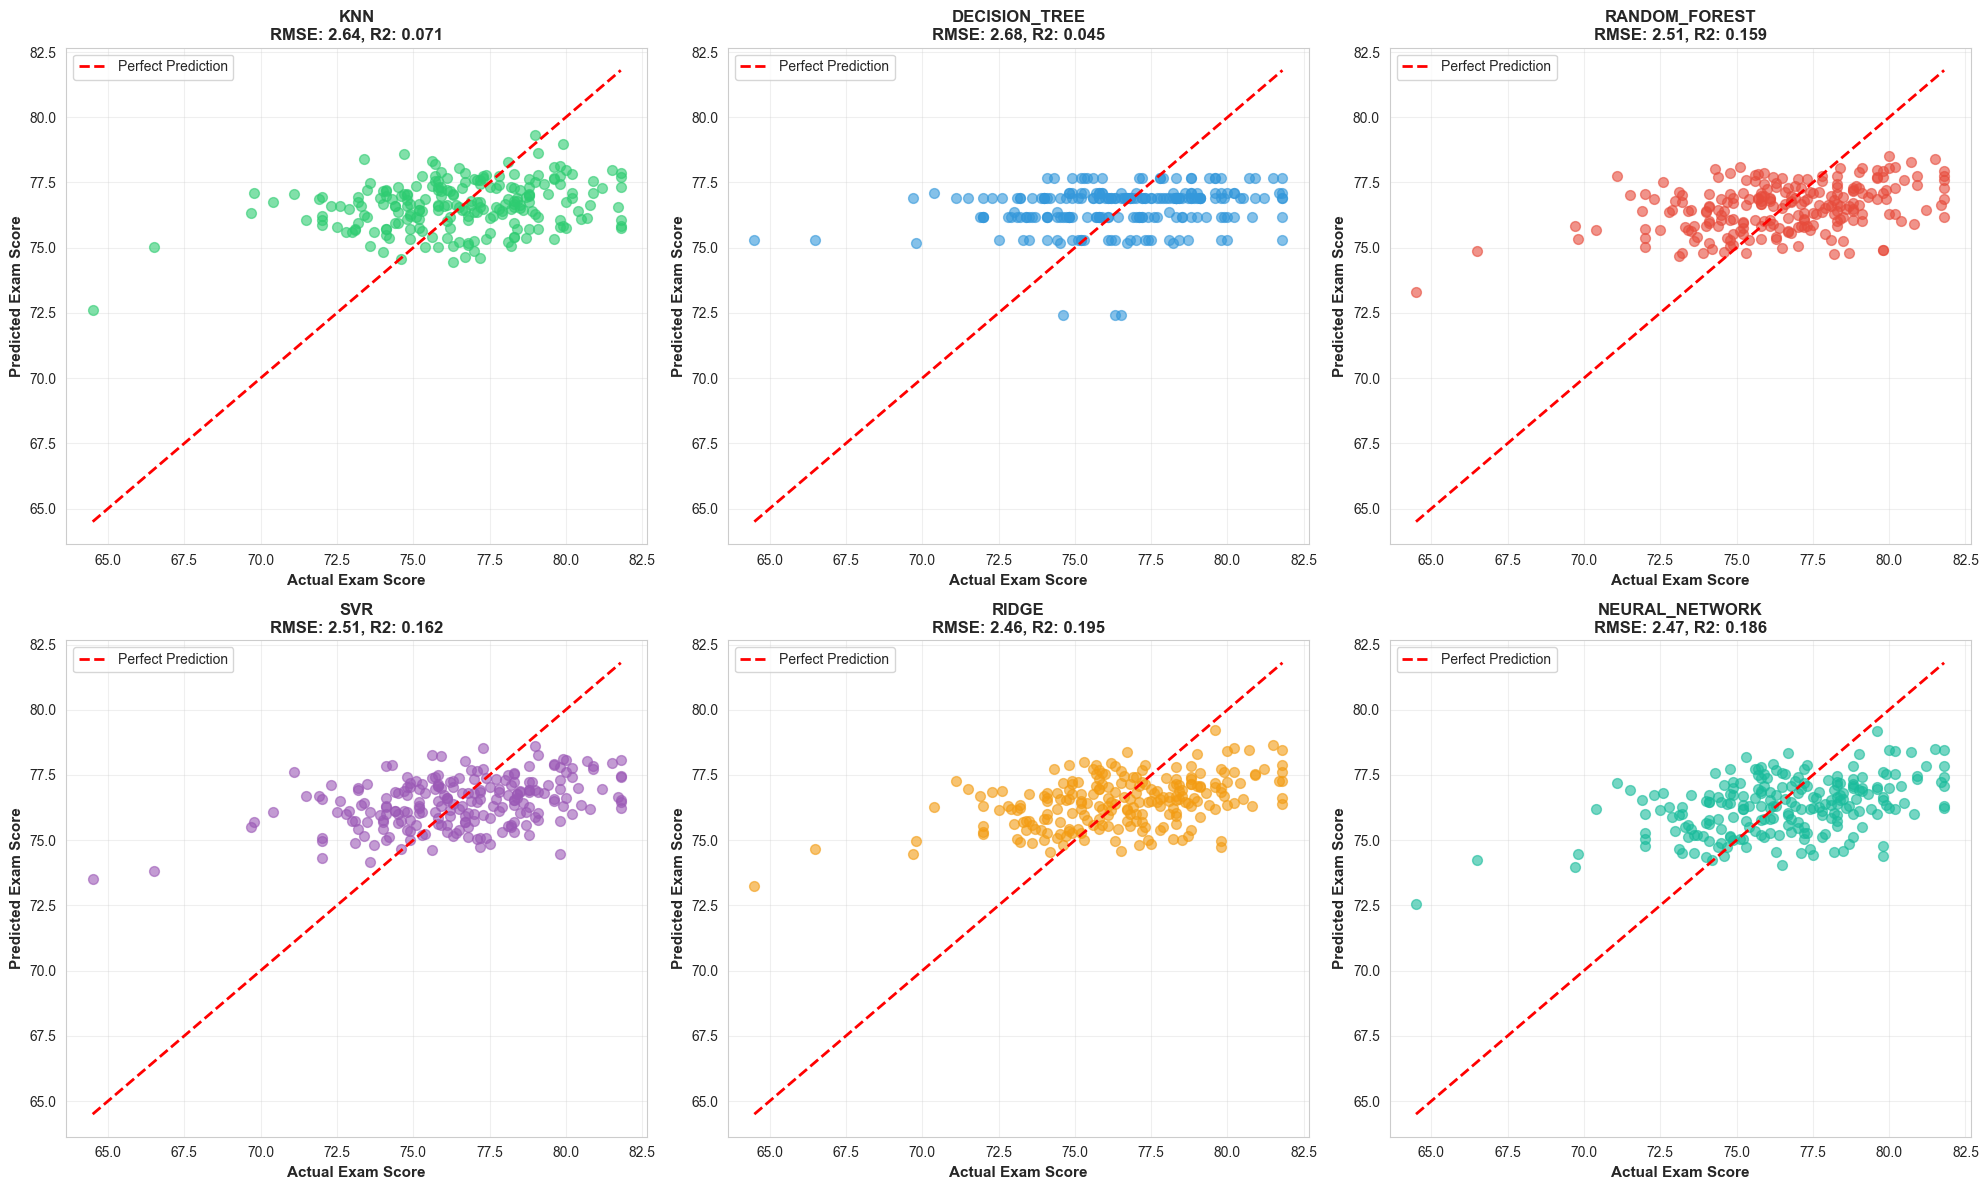


FEATURE IMPORTANCE ANALYSIS

DECISION_TREE - Top 10 Features:
           Feature  Importance
        StudyHours    0.280606
      ReviewCenter    0.264627
               GPA    0.108788
EnglishProficiency    0.103998
     SocialSupport    0.098580
       TestAnxiety    0.095677
  EmploymentStatus    0.047725
            Gender    0.000000
        Confidence    0.000000
        SleepHours    0.000000

RANDOM_FOREST - Top 10 Features:
           Feature  Importance
        StudyHours    0.123840
     MockExamScore    0.121880
       TestAnxiety    0.097990
               Age    0.096342
        SleepHours    0.076652
EnglishProficiency    0.069186
     SocialSupport    0.065093
               GPA    0.064652
        Confidence    0.058966
   MotivationScore    0.046534

Calculating permutation importance for remaining models...
   Processing KNN...

KNN - Top 10 Features (Permutation Importance):
           Feature  Importance
               Age    0.033826
     SocialSupport    0.02416

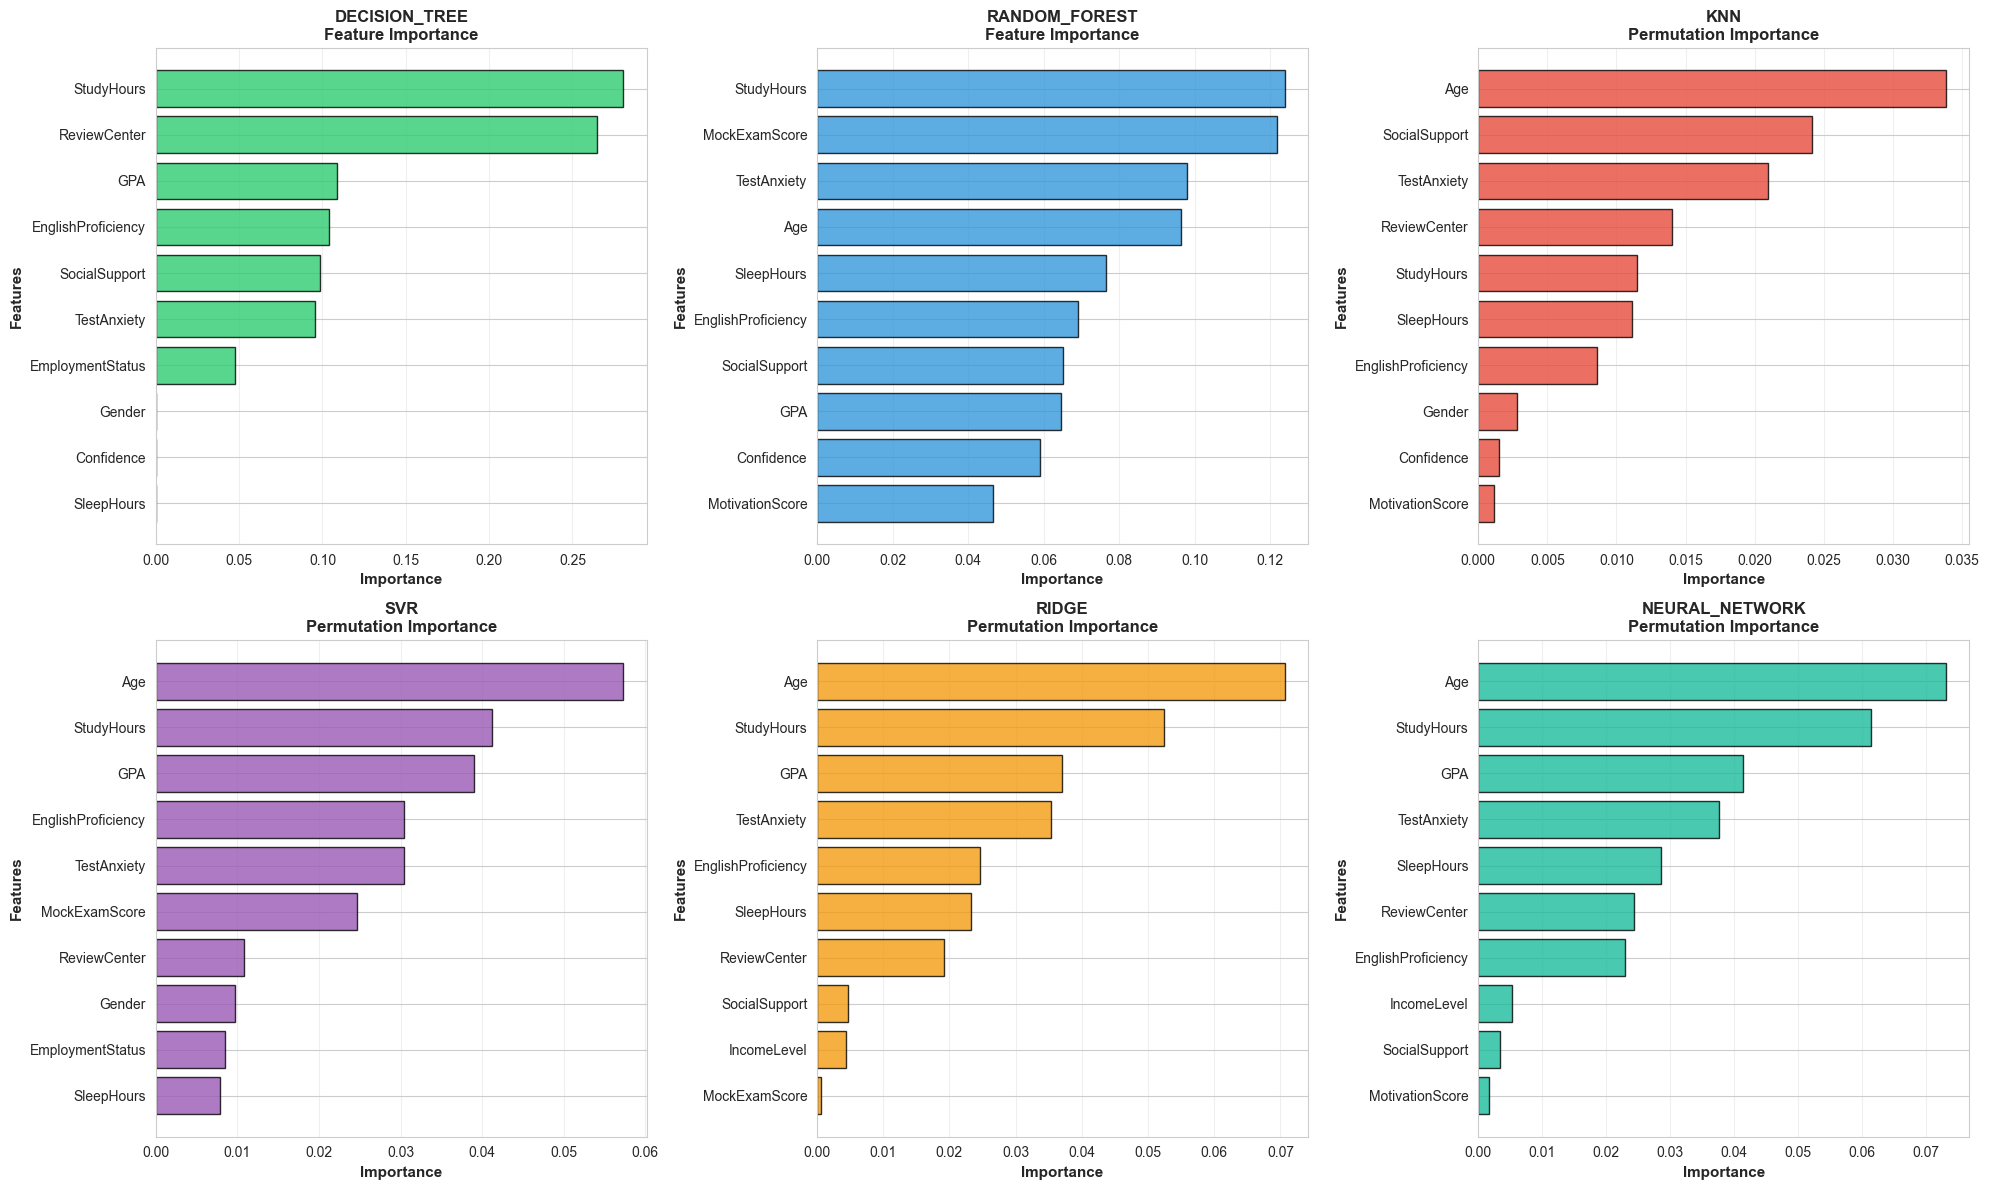


Saving feature importance data...
   Saved: ../saved_base_models/decision_tree_feature_importance.csv
   Saved: ../saved_base_models/random_forest_feature_importance.csv
   Saved: ../saved_base_models/knn_feature_importance.csv
   Saved: ../saved_base_models/svr_feature_importance.csv
   Saved: ../saved_base_models/ridge_feature_importance.csv
   Saved: ../saved_base_models/neural_network_feature_importance.csv

SAVING TRAINED MODELS
   Saved: knn_model.pkl
   Verified: knn_model.pkl
   Saved: decision_tree_model.pkl
   Verified: decision_tree_model.pkl
   Saved: random_forest_model.pkl
   Verified: random_forest_model.pkl
   Saved: svr_model.pkl
   Verified: svr_model.pkl
   Saved: ridge_model.pkl
   Verified: ridge_model.pkl
   Saved: neural_network_model.pkl
   Verified: neural_network_model.pkl

Models saved to saved_base_models/

CREATING AND SAVING PREPROCESSOR

Loading preprocessing components...
   Label encoders loaded
   Iterative imputer loaded
   Median imputer loaded
   S

In [1]:
# Cell 1: Imports
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import json
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

print("All libraries imported successfully")

# Cell 2: Load Preprocessed Data
X_train = np.load('../regression_processed_data/X_train.npy')
X_test = np.load('../regression_processed_data/X_test.npy')
y_train = np.load('../regression_processed_data/y_train.npy')
y_test = np.load('../regression_processed_data/y_test.npy')

print(f"Data Loaded:")
print(f"   Training samples: {X_train.shape[0]}")
print(f"   Test samples: {X_test.shape[0]}")
print(f"   Features: {X_train.shape[1]}")
print(f"   Target range: [{y_train.min():.2f}, {y_train.max():.2f}]")

# Cell 3: Define Model Configurations
model_configs = {
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'svr': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'epsilon': [0.01, 0.1, 0.2],
            'kernel': ['rbf']
        }
    },
    'ridge': {
        'model': Ridge(),
        'params': {
            'alpha': [0.1, 1.0, 10.0, 100.0]
        }
    },
    'neural_network': {
        'model': MLPRegressor(random_state=42, max_iter=1000, early_stopping=True),
        'params': {
            'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
            'activation': ['relu', 'tanh'],
            'alpha': [0.0001, 0.001, 0.01],
            'learning_rate': ['constant', 'adaptive']
        }
    }
}

print("Model Configurations:")
for name in model_configs.keys():
    print(f"   {name.upper()}")

# Cell 4: Train Models with 10-Fold CV - Track During and After Training
results = {}
cv = KFold(n_splits=10, shuffle=True, random_state=42)

print("=" * 70)
print("TRAINING BASE MODELS WITH 10-FOLD CROSS-VALIDATION")
print("=" * 70)

for name, config in model_configs.items():
    print(f"\n{'='*60}")
    print(f"Training {name.upper()}...")
    print(f"{'='*60}")

    start_time = time.time()

    grid_search = GridSearchCV(
        config['model'],
        config['params'],
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        return_train_score=True
    )

    grid_search.fit(X_train, y_train)
    training_time = time.time() - start_time
    best_model = grid_search.best_estimator_

    cv_results = grid_search.cv_results_
    best_index = grid_search.best_index_

    # -- DURING TRAINING: Extract per-fold train and validation scores --
    fold_train_mse = []
    fold_val_mse = []
    for fold_idx in range(10):
        train_key = f'split{fold_idx}_train_score'
        val_key = f'split{fold_idx}_test_score'
        fold_train_mse.append(-cv_results[train_key][best_index])
        fold_val_mse.append(-cv_results[val_key][best_index])

    fold_train_rmse = [np.sqrt(mse) for mse in fold_train_mse]
    fold_val_rmse = [np.sqrt(mse) for mse in fold_val_mse]

    print(f"\n   [DURING TRAINING] Per-Fold Performance (Best Hyperparams):")
    print(f"   {'Fold':<6} {'Train RMSE':<14} {'Val RMSE':<14} {'Gap':<10}")
    print(f"   {'-'*44}")
    for i in range(10):
        gap = fold_val_rmse[i] - fold_train_rmse[i]
        print(f"   {i+1:<6} {fold_train_rmse[i]:<14.4f} {fold_val_rmse[i]:<14.4f} {gap:<10.4f}")

    cv_train_rmse_mean = np.mean(fold_train_rmse)
    cv_train_rmse_std = np.std(fold_train_rmse)
    cv_val_rmse_mean = np.mean(fold_val_rmse)
    cv_val_rmse_std = np.std(fold_val_rmse)

    print(f"\n   During Training Summary:")
    print(f"      Avg Train RMSE: {cv_train_rmse_mean:.4f} +/- {cv_train_rmse_std:.4f}")
    print(f"      Avg Val RMSE:   {cv_val_rmse_mean:.4f} +/- {cv_val_rmse_std:.4f}")
    print(f"      Avg Fold Gap:   {cv_val_rmse_mean - cv_train_rmse_mean:.4f}")

    cv_mean = np.mean(fold_val_mse)
    cv_std = np.std(fold_val_mse)
    cv_min = np.min(fold_val_mse)
    cv_max = np.max(fold_val_mse)
    cv_rmse = np.sqrt(cv_mean)

    # -- AFTER TRAINING: Evaluate on training set and test set --
    y_pred_train = best_model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)

    y_pred = best_model.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_pred)
    test_r2 = r2_score(y_test, y_pred)

    overfit_gap = train_r2 - test_r2

    print(f"\n   [AFTER TRAINING] Final Model Performance:")
    print(f"      Training Set:")
    print(f"         RMSE: {train_rmse:.4f}")
    print(f"         MAE:  {train_mae:.4f}")
    print(f"         R2:   {train_r2:.4f}")
    print(f"      Test Set:")
    print(f"         RMSE: {test_rmse:.4f}")
    print(f"         MAE:  {test_mae:.4f}")
    print(f"         R2:   {test_r2:.4f}")
    print(f"      Overfit Gap (Train R2 - Test R2): {overfit_gap:.4f}")
    if overfit_gap > 0.1:
        print(f"      WARNING: Potential overfitting detected (gap > 0.1)")
    print(f"      Training Time: {training_time:.2f}s")
    print(f"      Best Params: {grid_search.best_params_}")

    results[name] = {
        'model': best_model,
        # During training metrics
        'fold_train_mse': fold_train_mse,
        'fold_val_mse': fold_val_mse,
        'fold_train_rmse': fold_train_rmse,
        'fold_val_rmse': fold_val_rmse,
        'cv_train_rmse_mean': cv_train_rmse_mean,
        'cv_train_rmse_std': cv_train_rmse_std,
        'cv_val_rmse_mean': cv_val_rmse_mean,
        'cv_val_rmse_std': cv_val_rmse_std,
        # CV summary
        'cv_mse_mean': cv_mean,
        'cv_mse_std': cv_std,
        'cv_mse_min': cv_min,
        'cv_mse_max': cv_max,
        'cv_rmse': cv_rmse,
        'cv_10fold_scores': fold_val_mse,
        # After training - training set
        'train_mse': train_mse,
        'train_rmse': train_rmse,
        'train_mae': train_mae,
        'train_r2': train_r2,
        # After training - test set
        'test_mse': test_mse,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'y_pred': y_pred,
        'y_pred_train': y_pred_train,
        'best_params': grid_search.best_params_,
        'training_time': training_time,
        'overfit_gap': overfit_gap
    }

# Cell 5: Visualize During Training - Per-Fold Train vs Validation RMSE
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
axes_flat = axes.flatten()

model_names = list(results.keys())
colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6', '#f39c12', '#1abc9c']

for idx, name in enumerate(model_names):
    ax = axes_flat[idx]
    folds = range(1, 11)
    train_rmse_vals = results[name]['fold_train_rmse']
    val_rmse_vals = results[name]['fold_val_rmse']

    ax.plot(folds, train_rmse_vals, marker='s', linewidth=2, label='Train RMSE',
            color=colors[idx], linestyle='--')
    ax.plot(folds, val_rmse_vals, marker='o', linewidth=2, label='Val RMSE',
            color=colors[idx], linestyle='-')

    ax.fill_between(folds, train_rmse_vals, val_rmse_vals, alpha=0.15, color=colors[idx])

    ax.set_xlabel('Fold Number', fontsize=11, fontweight='bold')
    ax.set_ylabel('RMSE', fontsize=11, fontweight='bold')
    ax.set_title(f'{name.upper()} - During Training\n'
                 f'Train: {results[name]["cv_train_rmse_mean"]:.3f}, '
                 f'Val: {results[name]["cv_val_rmse_mean"]:.3f}',
                 fontsize=12, fontweight='bold')
    ax.legend(fontsize=9)
    ax.grid(alpha=0.3)
    ax.set_xticks(range(1, 11))

if len(model_names) < len(axes_flat):
    for idx in range(len(model_names), len(axes_flat)):
        axes_flat[idx].axis('off')

plt.suptitle('DURING TRAINING: Per-Fold Train vs Validation RMSE', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

# Cell 6: Visualize After Training - Comprehensive Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Box plot of 10-fold validation scores (RMSE)
fold_data = []
for name in model_names:
    for fold_idx, mse in enumerate(results[name]['cv_10fold_scores'], 1):
        fold_data.append({
            'Model': name.upper(),
            'Fold': fold_idx,
            'RMSE': np.sqrt(mse)
        })

fold_df = pd.DataFrame(fold_data)

box_positions = []
for idx, name in enumerate(model_names):
    model_data = fold_df[fold_df['Model'] == name.upper()]['RMSE']
    bp = axes[0, 0].boxplot([model_data], positions=[idx], widths=0.6,
                            patch_artist=True,
                            boxprops=dict(facecolor=colors[idx], alpha=0.7),
                            medianprops=dict(color='black', linewidth=2))
    box_positions.append(idx)

axes[0, 0].set_xticks(box_positions)
axes[0, 0].set_xticklabels([name.upper() for name in model_names], rotation=45, ha='right')
axes[0, 0].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 0].set_title('10-Fold Cross-Validation RMSE Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Train vs CV vs Test RMSE
x = np.arange(len(model_names))
width = 0.25

train_rmse_values = [results[name]['train_rmse'] for name in model_names]
cv_rmse_values = [results[name]['cv_rmse'] for name in model_names]
test_rmse_values = [results[name]['test_rmse'] for name in model_names]

bars1 = axes[0, 1].bar(x - width, train_rmse_values, width, label='Train RMSE',
                       color=colors[:len(model_names)], alpha=0.9)
bars2 = axes[0, 1].bar(x, cv_rmse_values, width, label='10-Fold CV RMSE',
                       color=colors[:len(model_names)], alpha=0.6)
bars3 = axes[0, 1].bar(x + width, test_rmse_values, width, label='Test RMSE',
                       color=colors[:len(model_names)], alpha=0.35)

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.2f}', ha='center', va='bottom', fontsize=6)

axes[0, 1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('RMSE', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Train vs CV vs Test RMSE', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels([name.upper() for name in model_names], rotation=45, ha='right')
axes[0, 1].legend(fontsize=8)
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Train R2 vs Test R2
width = 0.35
train_r2_values = [results[name]['train_r2'] for name in model_names]
test_r2_values = [results[name]['test_r2'] for name in model_names]

bars1 = axes[1, 0].bar(x - width/2, train_r2_values, width, label='Train R2',
                       color=colors[:len(model_names)], alpha=0.8)
bars2 = axes[1, 0].bar(x + width/2, test_r2_values, width, label='Test R2',
                       color=colors[:len(model_names)], alpha=0.5)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.4f}', ha='center', va='bottom', fontsize=7)

axes[1, 0].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('R2 Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Train R2 vs Test R2 (Overfitting Check)', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels([name.upper() for name in model_names], rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)
axes[1, 0].set_ylim([0, 1.05])

# Plot 4: Overfitting gap
overfit_gaps = [results[name]['overfit_gap'] for name in model_names]
bar_colors = ['#e74c3c' if gap > 0.1 else '#2ecc71' for gap in overfit_gaps]

bars = axes[1, 1].bar([name.upper() for name in model_names], overfit_gaps,
                      color=bar_colors, alpha=0.8)

for bar in bars:
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{height:.4f}', ha='center', va='bottom', fontsize=9)

axes[1, 1].axhline(y=0.1, color='red', linestyle='--', linewidth=1.5, label='Overfit Threshold (0.1)')
axes[1, 1].set_xlabel('Models', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Train R2 - Test R2', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Overfitting Gap (Lower is Better)', fontsize=14, fontweight='bold')
axes[1, 1].set_xticklabels([name.upper() for name in model_names], rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 7: Performance Summary
summary_data = []
for name in model_names:
    summary_data.append({
        'Model': name.upper(),
        'Train RMSE': f"{results[name]['train_rmse']:.4f}",
        'CV RMSE': f"{results[name]['cv_rmse']:.4f}",
        'Test RMSE': f"{results[name]['test_rmse']:.4f}",
        'Train R2': f"{results[name]['train_r2']:.4f}",
        'Test R2': f"{results[name]['test_r2']:.4f}",
        'Test MAE': f"{results[name]['test_mae']:.4f}",
        'Overfit Gap': f"{results[name]['overfit_gap']:.4f}",
        'Time (s)': f"{results[name]['training_time']:.2f}"
    })

summary_df = pd.DataFrame(summary_data)
print("\n" + "=" * 90)
print("MODEL PERFORMANCE SUMMARY - DURING AND AFTER TRAINING")
print("=" * 90)
display(summary_df)

best_model_name = min(results.items(), key=lambda x: x[1]['test_rmse'])[0]
print(f"\nBest Model: {best_model_name.upper()}")
print(f"   Train RMSE: {results[best_model_name]['train_rmse']:.4f}")
print(f"   Test RMSE:  {results[best_model_name]['test_rmse']:.4f}")
print(f"   Test R2:    {results[best_model_name]['test_r2']:.4f}")
print(f"   Overfit Gap: {results[best_model_name]['overfit_gap']:.4f}")

print("\n" + "=" * 90)
print("DETAILED DURING-TRAINING AND AFTER-TRAINING RESULTS")
print("=" * 90)

for name in model_names:
    print(f"\n{name.upper()}")
    print(f"   [DURING TRAINING]")
    print(f"      Avg Train RMSE: {results[name]['cv_train_rmse_mean']:.4f} +/- {results[name]['cv_train_rmse_std']:.4f}")
    print(f"      Avg Val RMSE:   {results[name]['cv_val_rmse_mean']:.4f} +/- {results[name]['cv_val_rmse_std']:.4f}")
    print(f"      Avg Fold Gap:   {results[name]['cv_val_rmse_mean'] - results[name]['cv_train_rmse_mean']:.4f}")
    print(f"   [AFTER TRAINING]")
    print(f"      Train RMSE: {results[name]['train_rmse']:.4f}")
    print(f"      Train MAE:  {results[name]['train_mae']:.4f}")
    print(f"      Train R2:   {results[name]['train_r2']:.4f}")
    print(f"      Test RMSE:  {results[name]['test_rmse']:.4f}")
    print(f"      Test MAE:   {results[name]['test_mae']:.4f}")
    print(f"      Test R2:    {results[name]['test_r2']:.4f}")

    residuals = y_test - results[name]['y_pred']
    print(f"      Mean Residual: {np.mean(residuals):.4f}")
    print(f"      Std Residual:  {np.std(residuals):.4f}")

# Cell 8: Detailed Test Predictions Analysis
os.makedirs('../saved_base_models', exist_ok=True)

print("\n" + "=" * 70)
print("TEST PREDICTIONS ANALYSIS")
print("=" * 70)

for name in model_names:
    y_pred = results[name]['y_pred']

    prediction_details = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'Error': y_test - y_pred,
        'Absolute_Error': np.abs(y_test - y_pred),
        'Percent_Error': np.abs((y_test - y_pred) / y_test) * 100
    })

    print(f"\n{name.upper()}")
    print(f"   Total Test Samples: {len(y_test)}")
    print(f"   Mean Absolute Error: {prediction_details['Absolute_Error'].mean():.4f}")
    print(f"   Median Absolute Error: {prediction_details['Absolute_Error'].median():.4f}")
    print(f"   Max Error: {prediction_details['Absolute_Error'].max():.4f}")
    print(f"   Min Error: {prediction_details['Absolute_Error'].min():.4f}")

    print(f"\n   First 10 predictions:")
    print(prediction_details.head(10).to_string(index=False))

    csv_file = f'../saved_base_models/{name}_test_predictions.csv'
    prediction_details.to_csv(csv_file, index=False)
    print(f"\n   Saved detailed predictions: {csv_file}")

# Cell 9: Prediction vs Actual Plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, name in enumerate(model_names):
    y_pred = results[name]['y_pred']

    axes[idx].scatter(y_test, y_pred, alpha=0.6, s=50, color=colors[idx])

    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    axes[idx].plot([min_val, max_val], [min_val, max_val],
                   'r--', linewidth=2, label='Perfect Prediction')

    rmse = results[name]['test_rmse']
    r2 = results[name]['test_r2']

    axes[idx].set_xlabel('Actual Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Predicted Exam Score', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{name.upper()}\nRMSE: {rmse:.2f}, R2: {r2:.3f}',
                       fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Cell 10: Feature Importance Analysis
feature_names = json.load(open('../regression_processed_data/feature_names.json'))

print("\n" + "=" * 70)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

tree_based_models = ['decision_tree', 'random_forest']
feature_importance_dict = {}

# Native feature importance for tree-based models
for name in tree_based_models:
    if name in results:
        model = results[name]['model']
        importance = model.feature_importances_

        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importance
        }).sort_values('Importance', ascending=False)

        feature_importance_dict[name] = feature_importance

        print(f"\n{name.upper()} - Top 10 Features:")
        print(feature_importance.head(10).to_string(index=False))

# Permutation importance for other models
other_models = ['knn', 'svr', 'ridge', 'neural_network']

print("\nCalculating permutation importance for remaining models...")
for name in other_models:
    if name in results:
        print(f"   Processing {name.upper()}...")
        model = results[name]['model']

        perm_importance = permutation_importance(
            model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
        )

        feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': perm_importance.importances_mean
        }).sort_values('Importance', ascending=False)

        feature_importance_dict[name] = feature_importance

        print(f"\n{name.upper()} - Top 10 Features (Permutation Importance):")
        print(feature_importance.head(10).to_string(index=False))

# Visualize feature importance
num_models = len(feature_importance_dict)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, (name, importance_df) in enumerate(feature_importance_dict.items()):
    top_features = importance_df.head(10)

    axes[idx].barh(top_features['Feature'], top_features['Importance'],
                   color=colors[idx], edgecolor='black', alpha=0.8)
    axes[idx].set_xlabel('Importance', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Features', fontsize=11, fontweight='bold')

    importance_type = "Feature Importance" if name in tree_based_models else "Permutation Importance"
    axes[idx].set_title(f'{name.upper()}\n{importance_type}',
                       fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)

if num_models < 6:
    for idx in range(num_models, 6):
        axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Save feature importance
print("\nSaving feature importance data...")
for name, importance_df in feature_importance_dict.items():
    csv_file = f'../saved_base_models/{name}_feature_importance.csv'
    importance_df.to_csv(csv_file, index=False)
    print(f"   Saved: {csv_file}")

# Cell 11: Save Models
print("\n" + "=" * 70)
print("SAVING TRAINED MODELS")
print("=" * 70)

for name, data in results.items():
    model_path = f'../saved_base_models/{name}_model.pkl'
    try:
        with open(model_path, 'wb') as f:
            joblib.dump(data['model'], f, compress=3)
        print(f"   Saved: {name}_model.pkl")

        test_load = joblib.load(model_path)
        print(f"   Verified: {name}_model.pkl")
    except Exception as e:
        print(f"   ERROR saving {name}_model.pkl: {e}")

print("\nModels saved to saved_base_models/")

# Cell 12: Create and Save Preprocessor
import sys

os.makedirs('../saved_ensemble_models', exist_ok=True)

models_path = os.path.abspath('..')
if models_path not in sys.path:
    sys.path.insert(0, models_path)

from sklearn.experimental import enable_iterative_imputer
from regression_preprocessor import RegressionPreprocessor

print("\n" + "=" * 70)
print("CREATING AND SAVING PREPROCESSOR")
print("=" * 70)

try:
    print("\nLoading preprocessing components...")

    label_encoders = joblib.load('../regression_processed_data/label_encoders.pkl')
    print("   Label encoders loaded")

    iterative_imputer = joblib.load('../regression_processed_data/iterative_imputer.pkl')
    print("   Iterative imputer loaded")

    median_imputer = joblib.load('../regression_processed_data/median_imputer.pkl')
    print("   Median imputer loaded")

    scaler = joblib.load('../regression_processed_data/scaler.pkl')
    print("   Scaler loaded")

    with open('../regression_processed_data/feature_names.json', 'r') as f:
        feature_names = json.load(f)
    print("   Feature names loaded")

    with open('../regression_processed_data/imputation_config.json', 'r') as f:
        imputation_config = json.load(f)
    print("   Imputation config loaded")

    print("\nCreating preprocessor object...")
    preprocessor = RegressionPreprocessor(
        iterative_imputer=iterative_imputer,
        median_imputer=median_imputer,
        label_encoders=label_encoders,
        scaler=scaler,
        imputation_config=imputation_config
    )
    print(f"   Created: {preprocessor}")

    print("\nSaving preprocessor...")
    preprocessor_path = '../regression_processed_data/preprocessor.pkl'

    with open(preprocessor_path, 'wb') as f:
        joblib.dump(preprocessor, f, compress=3)

    file_size = os.path.getsize(preprocessor_path)
    print(f"   Preprocessor saved: {preprocessor_path}")
    print(f"   File size: {file_size} bytes")

    print("\nVerifying saved preprocessor...")
    test_load = joblib.load(preprocessor_path)
    print(f"   Preprocessor verified: {test_load}")
    print(f"   Feature names count: {len(test_load.get_feature_names())}")

    feature_names_path = '../regression_processed_data/feature_names.pkl'
    with open(feature_names_path, 'wb') as f:
        joblib.dump(feature_names, f, compress=3)
    print(f"   Feature names saved: {feature_names_path}")

    config_path = '../regression_processed_data/imputation_config.json'
    with open(config_path, 'w') as f:
        json.dump(imputation_config, f, indent=2)
    print(f"   Imputation config saved: {config_path}")

    print("\n" + "=" * 70)
    print("BASE MODELS TRAINING COMPLETE")
    print("=" * 70)

except FileNotFoundError as e:
    print(f"\nERROR: Required file not found: {e}")
    print("\nPlease run the preprocessing notebook first.")

except Exception as e:
    print(f"\nERROR: Failed to create preprocessor: {e}")
    import traceback
    traceback.print_exc()